#### Importações, funções e carregamento do dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Carregamento dos dados
df = pd.read_csv('data/Country-data.csv')
X = df.drop('country', axis=1)  # Variáveis para clusterização

#### Parte 2.2 - Quantos países existem no dataset?

In [33]:
country_count = df['country'].nunique()
print(f"Quantidade de países: {country_count}") # Quantidade de países: 167

Quantidade de países: 167


#### Parte 2.3 - Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

Observando os boxplots gerados, nota-se que as variáveis apresentam escalas bastante distintas. Variáveis como `gdpp` e `income` possuem valores consideravelmente maiores em comparação às demais.

Esta diferença de escala representa um problema, pois algoritmos baseados em distância euclidiana, como o K-Means, atribuem maior peso às variáveis com valores absolutos maiores. Portanto, torna-se necessária a padronização dos dados antes de realizar a clusterização.

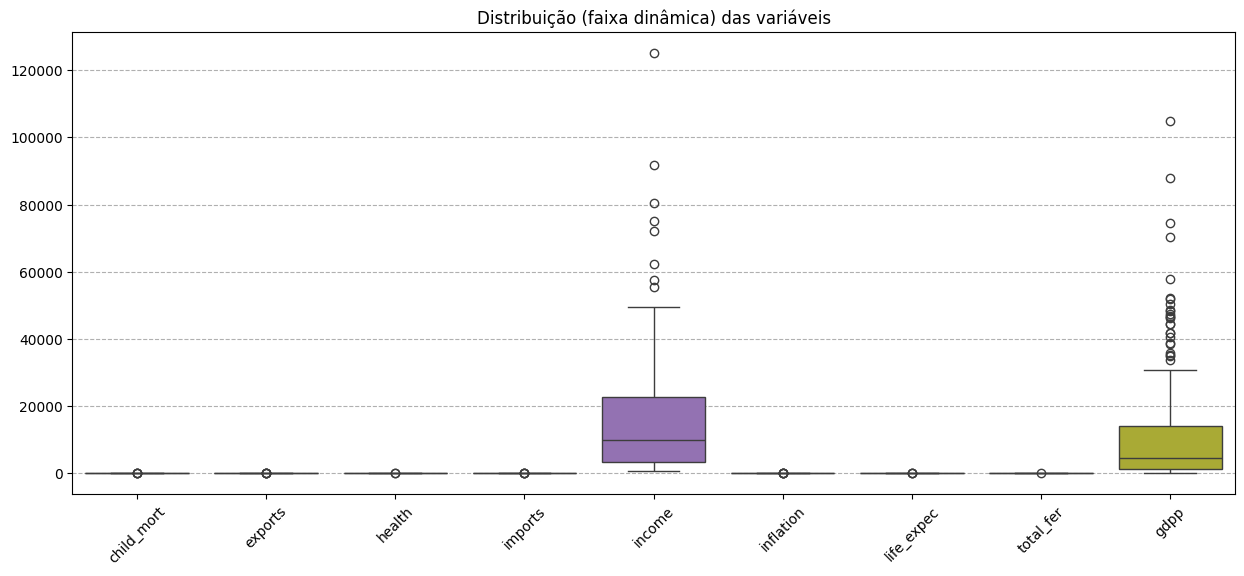

In [34]:
# Visualização da distribuição das variáveis
plt.figure(figsize=(15, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.title('Distribuição (faixa dinâmica) das variáveis')
plt.show()

#### Parte 2.4 - Realize o pré-processamento adequado dos dados.

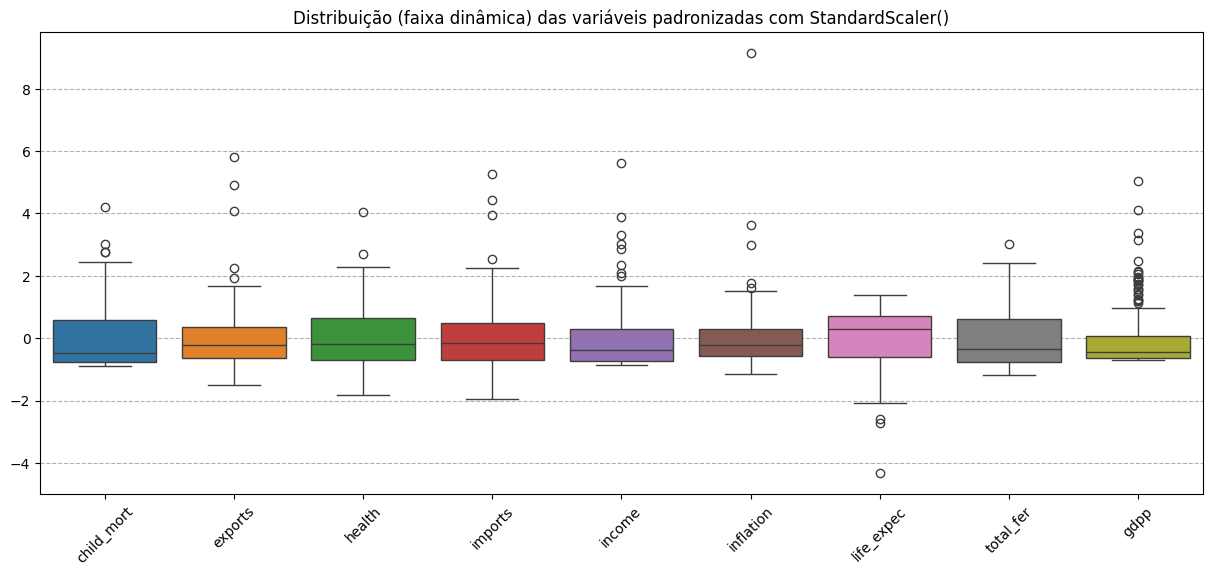

In [35]:
# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualização após padronização
plt.figure(figsize=(15, 6))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=X.columns))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.title('Distribuição (faixa dinâmica) das variáveis padronizadas com StandardScaler()')
plt.show()

#### Parte 3.1 - Para os dados pré-processados da etapa anterior, você irá:

**Realizar o agrupamento dos países em 3 grupos distintos.**  

- **a.** K-Médias  

In [36]:
# Aplicação do K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['kmeans_cluster'] = kmeans.labels_

- **b.** Clusterização Hierárquica 

In [ ]:
# Aplicação do HClust com 3 clusters
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['hierarchical_cluster'] = hierarchical_cluster.fit_predict(X_scaled)

#### Parte 3.2 - Para os resultados do K-Médias:
a. Interprete cada um dos clusters obtidos citando:  

In [ ]:
# Contagem de países por cluster
counts_k = df['kmeans_cluster'].value_counts()
print(f"Contagem de países por cluster (K-Means):")
print(f"Cluster 0: {counts_k.get(0, 0)} países")
print(f"Cluster 1: {counts_k.get(1, 0)} países")
print(f"Cluster 2: {counts_k.get(2, 0)} países")

Contagem de países por cluster (K-Means):
Cluster 0: 86 países
Cluster 1: 36 países
Cluster 2: 45 países


##### i. Qual a distribuição das dimensões em cada grupo

A partir da análise do gráfico de barras com as médias normalizadas, observa-se o seguinte perfil para cada cluster:

**Cluster 0**: Países com indicadores intermediários, situando-se entre os extremos de desenvolvimento econômico e social.

**Cluster 1**: Países desenvolvidos, caracterizados por elevados valores de `gdpp` e `income`, alta expectativa de vida (`life_expec`) e baixa mortalidade infantil (`child_mort`).

**Cluster 2**: Países em desenvolvimento, apresentando baixo PIB e renda per capita, alta mortalidade infantil e menor expectativa de vida.

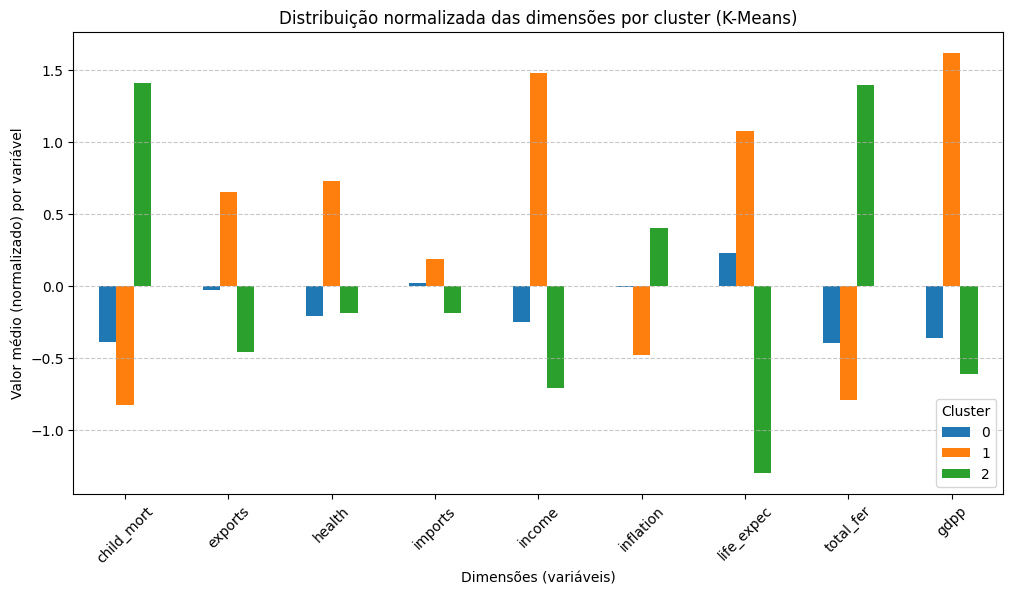

In [39]:
# Análise das médias por cluster
cluster_means_scaled = pd.DataFrame(X_scaled, columns=X.columns)
cluster_means_scaled['cluster'] = kmeans.labels_
cluster_means_scaled = cluster_means_scaled.groupby('cluster').mean().round(2)

# Visualização das médias normalizadas por cluster
cluster_means_scaled.T.plot(kind='bar', figsize=(12, 6))
plt.title('Distribuição normalizada das dimensões por cluster (K-Means)')
plt.ylabel('Valor médio (normalizado) por variável')
plt.xlabel('Dimensões (variáveis)')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### ii. O país que, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

In [40]:
# Encontrar o país mais próximo do centróide de cada cluster
# (análogo ao medóide, mas calculado a partir dos resultados do K-Means)

for cluster_id in range(kmeans.n_clusters):
    # Índices dos pontos no cluster
    cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
    
    # Centróide do cluster
    centroid = kmeans.cluster_centers_[cluster_id]
    
    # Dados do cluster
    cluster_data = X_scaled[cluster_indices]
    
    # Calcula a distância euclidiana de cada ponto ao centróide
    distances = np.linalg.norm(cluster_data - centroid, axis=1)
    
    # Encontra o índice do ponto mais próximo
    closest_point_index_in_cluster = np.argmin(distances)
    
    # Mapeia de volta para o índice original no dataframe
    original_index = cluster_indices[closest_point_index_in_cluster]
    
    # Exibe o país representativo
    representative_country = df.iloc[original_index]
    print(f"\nCluster {cluster_id}:")
    print(f"  País representativo: {representative_country['country']}")
    print(f"  Distância ao centróide: {distances[closest_point_index_in_cluster]:.4f}")


Cluster 0:
  País representativo: Suriname
  Distância ao centróide: 0.7198

Cluster 1:
  País representativo: Iceland
  Distância ao centróide: 0.7318

Cluster 2:
  País representativo: Guinea
  Distância ao centróide: 0.7704


O país representativo de cada cluster corresponde àquele mais próximo do centróide, funcionando como o elemento mais típico do grupo.

**Cluster 0 - Suriname**: Apresenta valores intermediários nas variáveis analisadas, posicionando-se entre os dois extremos socioeconômicos identificados.

**Cluster 1 - Iceland**: País desenvolvido que exemplifica o perfil do cluster com alta renda per capita e elevada expectativa de vida.

**Cluster 2 - Guinea**: Representa o perfil de país em desenvolvimento, com baixa renda e alta taxa de mortalidade infantil.

#### Parte 3.3 - Para os resultados da Clusterização Hierárquica, apresente o dendrograma e interprete os resultados.

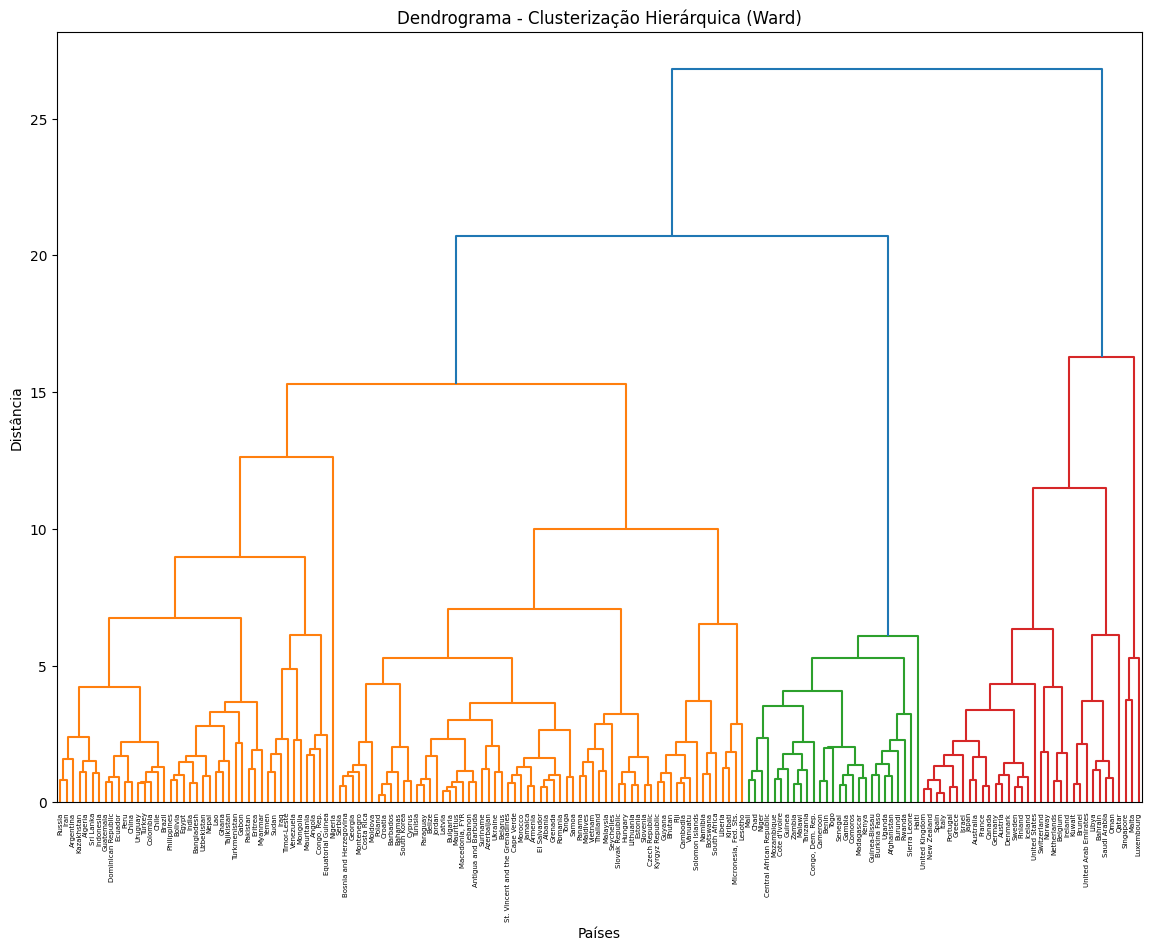

In [41]:
# Criação do dendrograma
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(14, 10))
dendrogram(
    linked,
    orientation='top',
    labels=df['country'].values,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Dendrograma - Clusterização Hierárquica (Ward)')
plt.xlabel('Países')
plt.ylabel('Distância')
plt.show()

O dendrograma apresenta a estrutura hierárquica de agrupamento dos países. A altura das ligações indica a distância entre os clusters, quanto maior a altura, maior a dissimilaridade entre os grupos sendo unidos.

É possível identificar a formação de três grandes grupos, resultado consistente com o obtido pelo K-Means. Países com perfis semelhantes (como Noruega e Suíça) são agrupados nos níveis iniciais da hierarquia, enquanto países com características muito distintas apenas se unem nos níveis superiores.

O método Ward busca minimizar a variância entre os clusters, resultando em grupos com tamanhos relativamente equilibrados.

#### Parte 3.4 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

**Semelhanças:**
- Ambos os algoritmos identificaram três grupos principais com perfis socioeconômicos distintos: países desenvolvidos, em desenvolvimento e subdesenvolvidos.
- A composição central dos clusters é bastante similar, com países como Suíça, Noruega e Luxemburgo consistentemente agrupados juntos em ambos os métodos.

**Diferenças:**
- O K-Means requer a definição prévia do número de clusters, enquanto a clusterização hierárquica permite esta escolha a posteriori através da análise do dendrograma.
- O K-Means apresenta variabilidade nos resultados devido à inicialização aleatória dos centroides, ao passo que o método hierárquico produz resultados determinísticos.
- O dendrograma gerado pelo método hierárquico oferece informações adicionais sobre a estrutura e relações entre os grupos.

**Interpretação:**
Ambos os métodos demonstraram eficácia na segmentação dos países. O K-Means destaca-se pela eficiência computacional e simplicidade de implementação. Já a clusterização hierárquica fornece uma visão mais detalhada da estrutura dos grupos.

#### Parte 4 - Escolha de algoritmos

#### 4.1 - Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.

1.  **Inicialização:** Definir o número K de clusters e inicializar K centróides de forma aleatória no espaço de dados.
2.  **Atribuição:** Calcular a distância de cada ponto para todos os centróides e atribuí-lo ao cluster correspondente ao centróide mais próximo.
3.  **Atualização:** Recalcular a posição de cada centróide como a média aritmética de todos os pontos pertencentes ao respectivo cluster.
4.  **Convergência:** Repetir os passos de atribuição e atualização até que os centróides se estabilizem ou até atingir o número máximo de iterações estabelecido.

#### 4.2 - Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo (K-Medóides).

In [42]:
# Inicialização do K-Means com medóides (pontos reais) ao invés de centroides aleatórios
# Após inicialização, o algoritmo segue normalmente calculando centroides como médias

np.random.seed(42)
# Seleciona 3 pontos aleatórios do dataset como centros iniciais
medoid_indices = np.random.choice(len(X_scaled), size=3, replace=False)
initial_centers = X_scaled[medoid_indices]

# Aplica K-Means com os medóides como inicialização
kmeans_medoid_init = KMeans(n_clusters=3, init=initial_centers, n_init=1, random_state=42)
kmeans_medoid_init.fit(X_scaled)

print("Países selecionados como pontos iniciais (medóides):")
for i, idx in enumerate(medoid_indices):
    print(f"Cluster {i}: {df.iloc[idx]['country']}")

print(f"\nAlgoritmo convergiu em {kmeans_medoid_init.n_iter_} iterações")

Países selecionados como pontos iniciais (medóides):
Cluster 0: Micronesia, Fed. Sts.
Cluster 1: Namibia
Cluster 2: Jordan

Algoritmo convergiu em 18 iterações


#### 4.3 - O algoritmo de K-médias é sensível a outliers nos dados. Explique.

A sensibilidade do K-Means a outliers decorre do cálculo do centróide pela média aritmética dos pontos. Quando há presença de outliers (pontos com valores distantes do conjunto principal), estes exercem influência desproporcional sobre a média, deslocando o centróide para longe da região de maior concentração de pontos do cluster.

Esta distorção compromete a representatividade do centróide e pode resultar em classificações incorretas.

#### 4.4 - Por que o algoritmo de DBScan é mais robusto à presença de outliers?

O DBSCAN fundamenta-se no conceito de densidade de pontos, classificando-os em três categorias:

1.  **Pontos Centrais:** Possuem quantidade mínima de vizinhos (`min_samples`) dentro de um raio definido (`eps`).
2.  **Pontos de Borda:** Encontram-se na vizinhança de pontos centrais, mas não atendem ao critério de ponto central.
3.  **Ruído:** Pontos isolados que não se enquadram nas categorias anteriores.

Como outliers caracterizam-se por estarem em regiões de baixa densidade, o DBSCAN os identifica naturalmente como ruído, impedindo que influenciem a formação dos clusters, que são construídos exclusivamente a partir de regiões densas.